In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib.image as mpimg
import numpy as np
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')
#执行第一步，连接谷歌云盘

Mounted at /content/drive


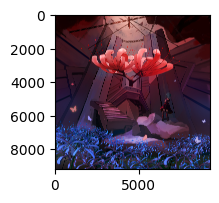

In [3]:
I = mpimg.imread('/content/drive/MyDrive/python 研究/6彼岸开绽2 .jpg')
plt.figure(figsize=(2,2))
plt.imshow(I)
#检查是否连上了谷歌云

# 从云盘中构建图

In [4]:
df = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/泉州公交，边权重.csv')

In [5]:
df_2 = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/泉州公交，点属性.csv')

In [6]:
# 过滤空节点
df = df.dropna(subset=["前一节点", "后一节点"])
G = nx.from_pandas_edgelist(df,"前一节点","后一节点", edge_attr=True, create_using=nx.MultiGraph())  #edge_attr=True,边的属性信息也要导入

In [7]:
df_2

,节点名称,区域属性,500M内是否有文保单位/古迹遗址/宗祠故地,线路,500M内文保单位/古迹遗址/宗祠故地的个数,Unnamed: 5,Unnamed: 6
0,泉州外国语学校,鲤城区,是,1路,8.0,NaN,NaN
1,泉州一中,鲤城区,是,1路,7.0,NaN,NaN
2,学府街西段,鲤城区,是,1路,6.0,NaN,NaN
3,北门街,鲤城区,是,1路,5.0,NaN,NaN
4,华侨新村,鲤城区,是,1路,5.0,NaN,NaN
...,...,...,...,...,...,...,...
926,温陵美食街(桥),鲤城区,是,东南护城河,1.0,NaN,NaN
927,MissBlue生曰蛋糕(泉府大第店)(桥),鲤城区,是,东南护城河,0.0,NaN,NaN
928,丰泽国有宿舍(桥),鲤城区,是,东南护城河,0.0,NaN,NaN
929,老厨房美食(桥),鲤城区,是,东南护城河,0.0,NaN,NaN


In [8]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['路线属性']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['500M内是否有文保单位/古迹遗址/宗祠故地']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['500M内是否有文保单位/古迹遗址/宗祠故地'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3




In [9]:
#查看节点的属性
for node, attrs in G.nodes.data():
    print("Node:", node)
    print("Attributes:", attrs)
    print()

Node: 泉州外国语学校
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 8.0}

Node: 泉州一中
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 7.0}

Node: 学府街西段
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 6.0}

Node: 北门街
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 5.0}

Node: 华侨新村
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 5.0}

Node: 医大二院鲤城院区
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 7.0}

Node: 钟楼
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 12.0}

Node: 泉州一院
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 13.0}

Node: 东门
Attributes: {'区域属性': '丰泽区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文保单位/古迹遗址/宗祠故地的个数': 6.0}

Node: 东湖公园
Attributes: {'区域属性': '鲤城区', '500M内是否有文保单位/古迹遗址/宗祠故地': '是', '500M内文

In [10]:
for u, v, attr in G.edges(data=True):
    print(f"边 ({u}, {v}) 的属性:")
    for key, value in attr.items():
        print(f"{key}: {value}")
    print()

边 (泉州外国语学校, 泉州一中) 的属性:
attribute: 1路

边 (泉州外国语学校, 泉州一中) 的属性:
attribute: 15路

边 (泉州外国语学校, 泉州一中) 的属性:
attribute: 22路

边 (泉州外国语学校, 学府街东段) 的属性:
attribute: 15路

边 (泉州外国语学校, 南俊路北段) 的属性:
attribute: 22路

边 (泉州一中, 学府街西段) 的属性:
attribute: 1路

边 (泉州一中, 学府街西段) 的属性:
attribute: 15路

边 (泉州一中, 学府街西段) 的属性:
attribute: 22路

边 (学府街西段, 北门街) 的属性:
attribute: 1路

边 (学府街西段, 普明村) 的属性:
attribute: 15路

边 (学府街西段, 朝天门) 的属性:
attribute: 22路

边 (北门街, 华侨新村) 的属性:
attribute: 1路

边 (北门街, 华侨新村) 的属性:
attribute: 3路

边 (北门街, 华侨新村) 的属性:
attribute: 17路

边 (北门街, 华侨新村) 的属性:
attribute: 21路

边 (北门街, 普明村) 的属性:
attribute: 3路

边 (北门街, 普明村) 的属性:
attribute: 21路

边 (北门街, 朝天门) 的属性:
attribute: 17路

边 (华侨新村, 医大二院鲤城院区) 的属性:
attribute: 1路

边 (华侨新村, 医大二院鲤城院区) 的属性:
attribute: 3路

边 (华侨新村, 医大二院鲤城院区) 的属性:
attribute: 17路

边 (华侨新村, 医大二院鲤城院区) 的属性:
attribute: 21路

边 (医大二院鲤城院区, 钟楼) 的属性:
attribute: 1路

边 (医大二院鲤城院区, 钟楼) 的属性:
attribute: 3路

边 (医大二院鲤城院区, 钟楼) 的属性:
attribute: 17路

边 (医大二院鲤城院区, 钟楼) 的属性:
attribute: 21路

边 (钟楼, 泉州一院) 的属性:
attribute: 1路

边 (钟楼, 

In [11]:
# 获取图G的节点数量
num_nodes = G.number_of_nodes()

print("图G的节点数量为:", num_nodes)

图G的节点数量为: 415


# 获取邻接矩阵的方法

In [12]:
# 获取邻接矩阵
adj_matrix = nx.adjacency_matrix(G)
# 将邻接矩阵转换为NumPy数组
adj_array = adj_matrix.toarray()


In [13]:
adj_array

array([[0, 3, 0, ..., 0, 0, 0],
       [3, 0, 3, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [14]:

#获取节点编号列表
node_ids = list(G.nodes())

# 构建邻接矩阵
adj_matrix = nx.adjacency_matrix(G, nodelist=node_ids)

# 将邻接矩阵转换为DataFrame
df1 = pd.DataFrame(adj_matrix.toarray(), index=node_ids, columns=node_ids)

# 保存DataFrame到CSV文件
#df1.to_csv('/content/drive/MyDrive/python 研究/XXXXX', index=True, header=True)


# 获取权重的方法

In [15]:
node_attributes = G.nodes.data()

In [16]:
target_attribute = '500M内文保单位/古迹遗址/宗祠故地的个数'
attribute=[]

In [17]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute in attributes:
        attribute_value = attributes[target_attribute]

        attribute.append(attribute_value)
    else:
        attribute.append(-1)

    print("节点:", node)
    print("属性:", target_attribute, "=", attribute_value)
    print()

节点: 泉州外国语学校
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 8.0

节点: 泉州一中
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 7.0

节点: 学府街西段
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 北门街
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 5.0

节点: 华侨新村
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 5.0

节点: 医大二院鲤城院区
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 7.0

节点: 钟楼
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 12.0

节点: 泉州一院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 13.0

节点: 东门
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 东湖公园
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 九一街口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 温陵路中段
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 津坂路口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 水务集团
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 刺桐公园南门
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 东美街口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 2.0

节点: 泉秀街口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 客运中心站南门
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 金帝花园
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 现代广场
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 2.0

节点: 东海街道办事处
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 黎明大学
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 宝珊花园
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.

In [18]:
attribute=np.array(attribute)
attribute.shape

(415,)

In [19]:
print(attribute)

[ 8.  7.  6.  5.  5.  7. 12. 13.  6.  6.  3.  3.  0.  0.  0.  2.  1.  0.
  0.  2.  3.  6.  4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  2.  0.  3.  3.  3.  1.
  0.  0.  0.  4. 10.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  3.  0.  0.  0.  0.  2.  2.  2.
  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  5.  5.  3. 11.  9.  6.  4.  4.  0.  0.  0.  3.  3.
  0.  0.  1.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3. 13. 13.  8.  9.
  6.  3.  2.  1.  0.  0.  8.  8.  0.  0.  2.  2.  1.  1.  4.  0.  0.  0.
 14.  4.  1.  2.  2.  2.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.
  1.  3.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  4.  3.
  3.  0.  0.  0.  1.  3.  5.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  2.
  2.  0.  0.  0.  0.  1.  3.  2.  1.  4.  1.  1.  1.  1.  4.  1.  1.  0.
  1.  9.  7.  4.  0.  0.  1.  1.  2.  0.  1.  0.  1

# 获取区域属性的方法（鲤城区）

In [20]:
node_attributes = G.nodes.data()
target_attribute_1 = '区域属性'
attribute_1=[]

In [21]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute_1 in attributes:
        attribute_value = attributes[target_attribute_1]
        attribute_1.append(attribute_value)
    else:
        attribute_1.append(-1)
    print("节点:", node)
    print("属性:", target_attribute_1, "=", attribute_value)
    print()

节点: 泉州外国语学校
属性: 区域属性 = 鲤城区

节点: 泉州一中
属性: 区域属性 = 鲤城区

节点: 学府街西段
属性: 区域属性 = 鲤城区

节点: 北门街
属性: 区域属性 = 鲤城区

节点: 华侨新村
属性: 区域属性 = 鲤城区

节点: 医大二院鲤城院区
属性: 区域属性 = 鲤城区

节点: 钟楼
属性: 区域属性 = 鲤城区

节点: 泉州一院
属性: 区域属性 = 鲤城区

节点: 东门
属性: 区域属性 = 丰泽区

节点: 东湖公园
属性: 区域属性 = 鲤城区

节点: 九一街口
属性: 区域属性 = 鲤城区

节点: 温陵路中段
属性: 区域属性 = 鲤城区

节点: 津坂路口
属性: 区域属性 = 丰泽区

节点: 水务集团
属性: 区域属性 = 丰泽区

节点: 刺桐公园南门
属性: 区域属性 = 丰泽区

节点: 东美街口
属性: 区域属性 = 丰泽区

节点: 泉秀街口
属性: 区域属性 = 丰泽区

节点: 客运中心站南门
属性: 区域属性 = 丰泽区

节点: 金帝花园
属性: 区域属性 = 丰泽区

节点: 现代广场
属性: 区域属性 = 丰泽区

节点: 东海街道办事处
属性: 区域属性 = 丰泽区

节点: 黎明大学
属性: 区域属性 = 丰泽区

节点: 宝珊花园
属性: 区域属性 = 丰泽区

节点: 法坊路口
属性: 区域属性 = 丰泽区

节点: 霞露口
属性: 区域属性 = 丰泽区

节点: 东海滨城
属性: 区域属性 = 丰泽区

节点: 格联通街
属性: 区域属性 = 丰泽区

节点: 东滨路口
属性: 区域属性 = 丰泽区

节点: 格联通街口
属性: 区域属性 = 丰泽区

节点: 公交东海站
属性: 区域属性 = 丰泽区

节点: 霞塘
属性: 区域属性 = 丰泽区

节点: 东梅
属性: 区域属性 = 丰泽区

节点: 泉州师院
属性: 区域属性 = 丰泽区

节点: 东海大街口
属性: 区域属性 = 丰泽区

节点: 府西路
属性: 区域属性 = 丰泽区

节点: 泉州行政中心
属性: 区域属性 = 丰泽区

节点: 晋光小学东海校区
属性: 区域属性 = 丰泽区

节点: 海星小区
属性: 区域属性 = 丰泽区

节点: 福厦铁路泉州站
属性: 区域属性 = 丰泽区

节点: 泉州软

In [22]:
attribute_1=np.array(attribute_1)
attribute_1.shape

(415,)

In [23]:
attribute_1

array(['鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '丰泽区',
       '鲤城区', '鲤城区', '鲤城区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区',
       '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区',
       '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区',
       '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区',
       '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '鲤城区', '鲤城区', '鲤城区', '鲤城区',
       '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '丰泽区', '丰泽区', '丰泽区',
       '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区',
       '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区',
       '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区',
       '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '南安市', '南安市', '南安市',
       '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区',
       '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区', '鲤城区',
       '鲤城区', '鲤城区', '鲤城区', '丰泽区', '丰泽区', '丰泽区', '丰泽区', '南安市', '南安市',
       '南安市', '南安市',

In [24]:
# 创建映射字典
mapping = {
    "鲤城区": 0,
    "丰泽区": 1,
    "洛江区": 2,
    "南安市": 3,
    "晋江市":4
}



# 将中文映射为数字
numeric_array = [mapping[item] for item in attribute_1]



In [25]:
numeric_array=np.array(numeric_array)
print(numeric_array)

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 4 4 4 1 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 4 4 4
 4 4 4 4 4 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 4 4 4
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


**将标量转化为独热编码**

In [26]:
import numpy as np
eye=np.eye(5)

B=eye[numeric_array]



In [27]:
B

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [28]:
C = np.concatenate((adj_array, B), axis=1)

In [29]:
C.shape

(415, 420)

# 将图的边转换为 edge_index


In [30]:
# 获取图的边列表
edge_list = list(G.edges())

# 将边列表转换为 edge_index
edge_index = np.array(edge_list).T

# 打印结果
edge_index= np.array(edge_index)
edge_index

array([['泉州外国语学校', '泉州外国语学校', '泉州外国语学校', ..., 'MissBlue生曰蛋糕(泉府大第店)(桥)',
        '丰泽国有宿舍(桥)', '老厨房美食(桥)'],
       ['泉州一中', '泉州一中', '泉州一中', ..., '丰泽国有宿舍(桥)', '老厨房美食(桥)', '儿童医院(桥)']],
      dtype='<U22')

In [31]:
edge_index.shape

(2, 876)

**这里使用一种方法，能提取纯数字的edge_index**

In [32]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G2 = nx.convert_node_labels_to_integers(G)

In [33]:
# 获取图的边列表
edge_list_number = list(G2.edges())
# 将边列表转换为 edge_index
edge_index_number = np.array(edge_list_number).T

In [34]:
# 打印结果
edge_index_number= np.array(edge_index_number)
edge_index_number

array([[  0,   0,   0, ..., 411, 412, 413],
       [  1,   1,   1, ..., 412, 413, 414]])

# 创建节点映射字典

In [35]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G_int_labels = nx.convert_node_labels_to_integers(G)


In [36]:
G_int_labels

In [37]:
dir(G_int_labels)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__networkx_backend__',
 '__networkx_cache__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_key_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'new_edge_key',
 'node_attr_d

In [38]:
G_int_labels.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [39]:
list1=G_int_labels.nodes


In [40]:
list1=np.array(list1)
list1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [41]:
list_1=G.nodes.data()
list_1=np.array(list_1)

In [42]:
list_1[1][0]


'泉州一中'

In [43]:
list_2=list_1
list2 = []  # 创建一个空列表，用于存储遍历结果

for item in list_2:
    list2.append(item[0])

list2=np.array(list2)

In [44]:
list2

array(['泉州外国语学校', '泉州一中', '学府街西段', '北门街', '华侨新村', '医大二院鲤城院区', '钟楼',
       '泉州一院', '东门', '东湖公园', '九一街口', '温陵路中段', '津坂路口', '水务集团', '刺桐公园南门',
       '东美街口', '泉秀街口', '客运中心站南门', '金帝花园', '现代广场', '东海街道办事处', '黎明大学',
       '宝珊花园', '法坊路口', '霞露口', '东海滨城', '格联通街', '东滨路口', '格联通街口', '公交东海站',
       '霞塘', '东梅', '泉州师院', '东海大街口', '府西路', '泉州行政中心', '晋光小学东海校区', '海星小区',
       '福厦铁路泉州站', '泉州软件园', '霞美', '曾坑', '黄龙大桥头', '招贤社区', '丰泽实小潘山校区',
       '北清西路', '溪墘村口', '送客亭', '段湖村', '西郊', '孟衙巷口', '龙头山', '临漳水闸', '金洲寺',
       '金洲旱闸', '新华旱闸', '金山水闸', '义全街西段', '鲤城公安分局', '幸福街口', '泉秀街西段', '浦西路口',
       '刺桐路口', '泉州电信公司', '正骨医院', '行政执法局', '宝洲街口', '坪山路南段', '客运中心站东门',
       '院前公交站', '泉州软件园（北）', '群峰社区', '玉井村', '上下村', '戴厝', '群石小学', '田边',
       '田边村口', '清源山风景区（910医院路口）', '花园头', '花博园', '泉山路南段', '普明村', '儿童医院',
       '泰和兴业', '人民医院', '公交大厦', '坪山洞东侧', '山海路口', '东星', '埭头', '前头', '浔美',
       '世界城东门', '泉州一院城东分院', '泉州一院城东分院首末站', '四黄', '吓厝', '交警高速支队二大队', '新宅',
       '仙塘', '森隆电讯', '常泰路中段', '泰明街西段', '锦田村', '明新华侨中学', '斗南路口', '古店社区',


In [45]:
list1 = list1
list2 = list2
mapping_dict = { }  # 创建一个空字典

for i in range(len(list1)):
    key = str(list1[i])  # 将整数转换为字符串作为键
    value = list2[i]  # 节点名称作为值
    mapping_dict[key] = value



In [46]:
mapping_dict

{'0': '泉州外国语学校',
 '1': '泉州一中',
 '2': '学府街西段',
 '3': '北门街',
 '4': '华侨新村',
 '5': '医大二院鲤城院区',
 '6': '钟楼',
 '7': '泉州一院',
 '8': '东门',
 '9': '东湖公园',
 '10': '九一街口',
 '11': '温陵路中段',
 '12': '津坂路口',
 '13': '水务集团',
 '14': '刺桐公园南门',
 '15': '东美街口',
 '16': '泉秀街口',
 '17': '客运中心站南门',
 '18': '金帝花园',
 '19': '现代广场',
 '20': '东海街道办事处',
 '21': '黎明大学',
 '22': '宝珊花园',
 '23': '法坊路口',
 '24': '霞露口',
 '25': '东海滨城',
 '26': '格联通街',
 '27': '东滨路口',
 '28': '格联通街口',
 '29': '公交东海站',
 '30': '霞塘',
 '31': '东梅',
 '32': '泉州师院',
 '33': '东海大街口',
 '34': '府西路',
 '35': '泉州行政中心',
 '36': '晋光小学东海校区',
 '37': '海星小区',
 '38': '福厦铁路泉州站',
 '39': '泉州软件园',
 '40': '霞美',
 '41': '曾坑',
 '42': '黄龙大桥头',
 '43': '招贤社区',
 '44': '丰泽实小潘山校区',
 '45': '北清西路',
 '46': '溪墘村口',
 '47': '送客亭',
 '48': '段湖村',
 '49': '西郊',
 '50': '孟衙巷口',
 '51': '龙头山',
 '52': '临漳水闸',
 '53': '金洲寺',
 '54': '金洲旱闸',
 '55': '新华旱闸',
 '56': '金山水闸',
 '57': '义全街西段',
 '58': '鲤城公安分局',
 '59': '幸福街口',
 '60': '泉秀街西段',
 '61': '浦西路口',
 '62': '刺桐路口',
 '63': '泉州电信公司',
 '64': '正骨医院',
 '65': '行政执法局',

# 统计已经有的信息

**邻接矩阵**

In [50]:
#邻接矩阵
print(adj_array)
print(adj_array.shape)

[[0 3 0 ... 0 0 0]
 [3 0 3 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
(415, 415)


**区域属性**

In [51]:
#区域属性, "鲤城区": 0,"丰泽区": 1, "洛江区": 2, "南安市": 3
print(numeric_array)
print(numeric_array.shape)

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 4 4 4 1 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 4 4 4
 4 4 4 4 4 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 4 4 4
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
(415,)


**限定范围内的古迹数量**

In [52]:
#500m内古迹的数量，作为权重
print(attribute)
print(attribute.shape)

[ 8.  7.  6.  5.  5.  7. 12. 13.  6.  6.  3.  3.  0.  0.  0.  2.  1.  0.
  0.  2.  3.  6.  4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  2.  0.  3.  3.  3.  1.
  0.  0.  0.  4. 10.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  3.  0.  0.  0.  0.  2.  2.  2.
  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  5.  5.  3. 11.  9.  6.  4.  4.  0.  0.  0.  3.  3.
  0.  0.  1.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3. 13. 13.  8.  9.
  6.  3.  2.  1.  0.  0.  8.  8.  0.  0.  2.  2.  1.  1.  4.  0.  0.  0.
 14.  4.  1.  2.  2.  2.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.
  1.  3.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  4.  3.
  3.  0.  0.  0.  1.  3.  5.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  2.
  2.  0.  0.  0.  0.  1.  3.  2.  1.  4.  1.  1.  1.  1.  4.  1.  1.  0.
  1.  9.  7.  4.  0.  0.  1.  1.  2.  0.  1.  0.  1

In [53]:
attribute[5]

7.0

In [54]:
attribute_2_dimension=attribute.reshape(-1,1)

In [55]:
attribute_2_dimension.shape

(415, 1)

In [56]:
attribute_combined=np.concatenate((C, attribute_2_dimension), axis=1)

In [57]:
attribute_combined.shape

(415, 421)

**此处需要将古迹数量的节点进行归类，可以选择3类4类都可以**

In [58]:
#注意调整range的值
attribute_3=[]
for i in range(len(attribute)):
  if attribute[i]<=2 :
    attribute_3.append(0)
  elif attribute[i]<=5:
    attribute_3.append(1)
  else:
    attribute_3.append(2)


attribute_3=np.array(attribute_3)

In [59]:
attribute_3

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,

**点和点的连接关系，从边的角度考虑**

In [60]:
#点和点的连接关系，另一种表现形式,从边的角度考虑
print(edge_index)
print(edge_index.shape)

[['泉州外国语学校' '泉州外国语学校' '泉州外国语学校' ... 'MissBlue生曰蛋糕(泉府大第店)(桥)' '丰泽国有宿舍(桥)'
  '老厨房美食(桥)']
 ['泉州一中' '泉州一中' '泉州一中' ... '丰泽国有宿舍(桥)' '老厨房美食(桥)' '儿童医院(桥)']]
(2, 876)


In [61]:
print(edge_index_number)
print(edge_index_number.shape)

[[  0   0   0 ... 411 412 413]
 [  1   1   1 ... 412 413 414]]
(2, 876)


**节点和数字间的映射关系**

In [62]:
#节点和数字间的映射关系

print(mapping_dict)
print(len(mapping_dict))

{'0': '泉州外国语学校', '1': '泉州一中', '2': '学府街西段', '3': '北门街', '4': '华侨新村', '5': '医大二院鲤城院区', '6': '钟楼', '7': '泉州一院', '8': '东门', '9': '东湖公园', '10': '九一街口', '11': '温陵路中段', '12': '津坂路口', '13': '水务集团', '14': '刺桐公园南门', '15': '东美街口', '16': '泉秀街口', '17': '客运中心站南门', '18': '金帝花园', '19': '现代广场', '20': '东海街道办事处', '21': '黎明大学', '22': '宝珊花园', '23': '法坊路口', '24': '霞露口', '25': '东海滨城', '26': '格联通街', '27': '东滨路口', '28': '格联通街口', '29': '公交东海站', '30': '霞塘', '31': '东梅', '32': '泉州师院', '33': '东海大街口', '34': '府西路', '35': '泉州行政中心', '36': '晋光小学东海校区', '37': '海星小区', '38': '福厦铁路泉州站', '39': '泉州软件园', '40': '霞美', '41': '曾坑', '42': '黄龙大桥头', '43': '招贤社区', '44': '丰泽实小潘山校区', '45': '北清西路', '46': '溪墘村口', '47': '送客亭', '48': '段湖村', '49': '西郊', '50': '孟衙巷口', '51': '龙头山', '52': '临漳水闸', '53': '金洲寺', '54': '金洲旱闸', '55': '新华旱闸', '56': '金山水闸', '57': '义全街西段', '58': '鲤城公安分局', '59': '幸福街口', '60': '泉秀街西段', '61': '浦西路口', '62': '刺桐路口', '63': '泉州电信公司', '64': '正骨医院', '65': '行政执法局', '66': '宝洲街口', '67': '坪山路南段', '68': '客运中心站东门', '69': '院前公交站', '70

In [63]:
#节点和数字间的映射关系(翻转)
reversed_dict = {value: key for key, value in mapping_dict.items()}
print(reversed_dict)

{'泉州外国语学校': '0', '泉州一中': '1', '学府街西段': '2', '北门街': '3', '华侨新村': '4', '医大二院鲤城院区': '5', '钟楼': '6', '泉州一院': '7', '东门': '8', '东湖公园': '9', '九一街口': '10', '温陵路中段': '11', '津坂路口': '12', '水务集团': '13', '刺桐公园南门': '14', '东美街口': '15', '泉秀街口': '16', '客运中心站南门': '17', '金帝花园': '18', '现代广场': '19', '东海街道办事处': '20', '黎明大学': '21', '宝珊花园': '22', '法坊路口': '23', '霞露口': '24', '东海滨城': '25', '格联通街': '26', '东滨路口': '27', '格联通街口': '28', '公交东海站': '29', '霞塘': '30', '东梅': '31', '泉州师院': '32', '东海大街口': '33', '府西路': '34', '泉州行政中心': '35', '晋光小学东海校区': '36', '海星小区': '37', '福厦铁路泉州站': '38', '泉州软件园': '39', '霞美': '40', '曾坑': '41', '黄龙大桥头': '42', '招贤社区': '43', '丰泽实小潘山校区': '44', '北清西路': '45', '溪墘村口': '46', '送客亭': '47', '段湖村': '48', '西郊': '49', '孟衙巷口': '50', '龙头山': '51', '临漳水闸': '52', '金洲寺': '53', '金洲旱闸': '54', '新华旱闸': '55', '金山水闸': '56', '义全街西段': '57', '鲤城公安分局': '58', '幸福街口': '59', '泉秀街西段': '60', '浦西路口': '61', '刺桐路口': '62', '泉州电信公司': '63', '正骨医院': '64', '行政执法局': '65', '宝洲街口': '66', '坪山路南段': '67', '客运中心站东门': '68', '院前公交站': '69', '泉州

In [64]:
reversed_dict["新宅"]

'99'

In [65]:
len(attribute)

415

**掩码的的制作**

In [66]:
total_nodes = len(attribute)
num_false = 120

mask_1 = np.array([False] * num_false + [True] * (total_nodes - num_false))
np.random.shuffle(mask_1)



In [67]:
print(mask_1)
print(mask_1.shape)

[ True  True  True  True  True False False False  True  True  True  True
 False False  True  True  True  True False  True  True  True False  True
 False  True  True False  True False  True  True  True  True  True False
 False False False False  True  True  True  True  True  True False  True
  True  True  True False False  True False  True  True  True  True  True
  True False  True  True  True  True  True False  True  True False False
  True  True False  True  True False False  True  True  True False False
  True  True False False False  True  True False  True  True  True  True
  True False False  True  True  True False  True  True  True  True  True
 False False  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True False  True  True  True False False
  True  True False False  True  True  True  True  True  True False False
  True  True  True  True  True False  True False  T

# 构建图神经网络之前的准备工作

In [47]:
# Install required packages.

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

2.5.1+cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 3.3 MB/s eta 0:00:00


**先构建数据集  一定要检查数据集的结构是否一致**




In [68]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_3 # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined) ,train_mask=torch.tensor(mask_1)        )

<ipython-input-68-629bad9e22ef>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined) ,train_mask=torch.tensor(mask_1)        )


In [69]:
data

Data(x=[415, 415], edge_index=[2, 1010], y=[415], z=[415], b=[415, 421], train_mask=[415])

**此处需要检查数据是否正确**

In [70]:
data.edge_index

tensor([[  0,   0,   0,  ..., 413, 414, 414],
        [  1, 198, 242,  ..., 414,  83, 413]])

In [71]:
data.b.shape

torch.Size([415, 421])

**设计一个绘图函数**

In [72]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


**设计一个可视化嵌入函数**

In [73]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    h = h.detach().cpu().numpy()
    scatter=plt.scatter(h[:, 0], h[:, 1], s=70, c=color, cmap="Set2")#Set2  cool


    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.colorbar(scatter)
    plt.show()

In [74]:
data.y

tensor([2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,
        2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0,

**用不同的形状显示**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch

def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    h = h.detach().cpu().numpy()
    color = color.detach().cpu().numpy()

    markers = ['o', '^', 's', 'p', '*', 'x', 'D', '+', 'v', '<', '>']  # 定义标记
    unique_colors = set(color)  # 获取唯一的类别

    for i, u_color in enumerate(unique_colors):
        marker = markers[i % len(markers)]  # 使用不同的标记
        mask = (color == u_color)
        #plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker, label=f'Class {u_color}')
        plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker)

    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)

    plt.legend()
    plt.show()

In [75]:
#查看颜色
color_map = plt.cm.Set2
color = color_map(1)
print(color)

(0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0)


In [76]:
rgb = tuple(int(255 * x) for x in (0.9882352941176471, 0.5529411764705883, 0.3843137254901961))
print(rgb)


(252, 141, 98)


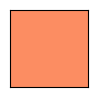

In [77]:
import matplotlib.pyplot as plt

# 给定的RGB值

plt.figure(figsize=(1, 1))  # 设置图形大小为1x1英寸
plt.xticks([])
plt.yticks([])
plt.imshow([[rgb]], aspect='auto')  # 绘制颜色块
plt.show()


**开始可视化**

必须观察图是否正确

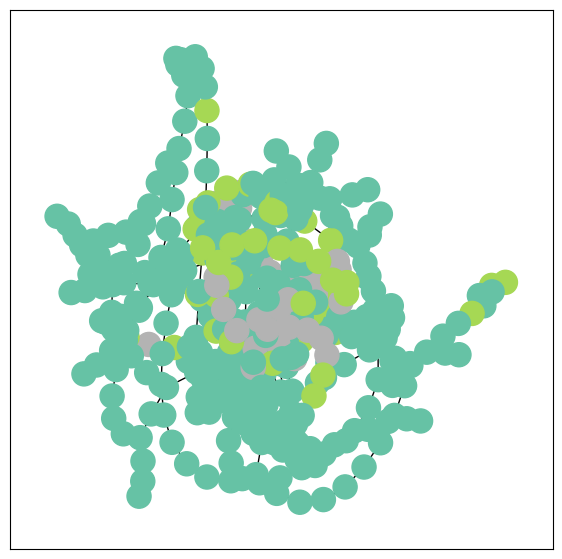

In [78]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [79]:
len(data.b.T)

421

# 构建图神经网络

In [80]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(len(data.b.T), 64)
        self.conv2 = GCNConv(64, 16)
        self.conv3 = GCNConv(16, 6)
        self.classifier = Linear(6, 6)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(421, 64)
  (conv2): GCNConv(64, 16)
  (conv3): GCNConv(16, 6)
  (classifier): Linear(in_features=6, out_features=6, bias=True)
)


Embedding shape: [415, 6]


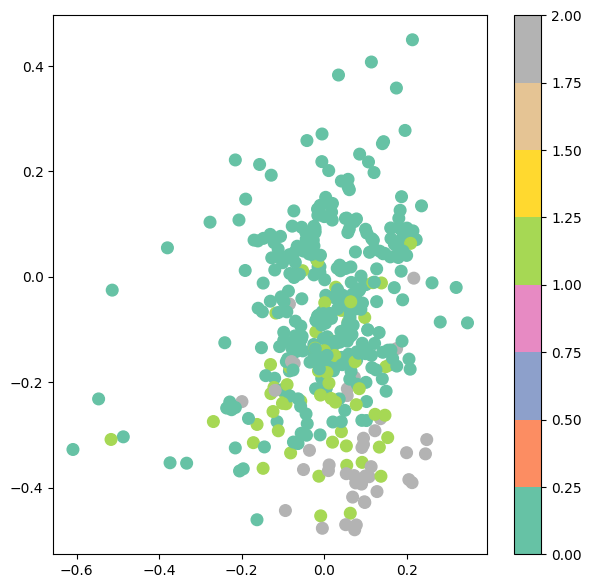

In [81]:
model = GCN()

_, h = model(data.b.float(), data.edge_index)

print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)   #data.z

In [82]:
data.y[data.train_mask]

tensor([2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 1, 0, 0, 0])

In [83]:
data.train_mask.shape

torch.Size([415])

In [84]:
import time
from IPython.display import Javascript  # Restrict height of output cell.

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.b.float(), data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].long())  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h
loss_remember=[]
for epoch in range(501):
    loss, h = train(data)
    loss_remember.append(loss)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)   #data.y可以用data.z  替换
        time.sleep(0.3)

Output hidden; open in https://colab.research.google.com to view.

Text(0, 0.5, 'Loss')

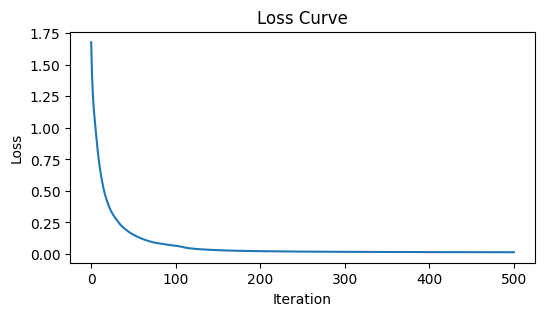

In [85]:
for i in range(len(loss_remember)):

    loss_remember[i]=loss_remember[i].detach().numpy()

import matplotlib.pyplot as plt
import numpy as np
losses=loss_remember
plt.figure(figsize=(6,3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [86]:
h.shape

torch.Size([415, 6])

In [87]:
h

tensor([[-0.9995,  0.8457,  0.9940, -0.7065,  0.7685,  0.7230],
        [-0.9999,  0.9593,  0.9721, -0.9676,  0.9927,  0.9534],
        [-0.9633,  1.0000,  0.9896, -0.9981,  0.9102,  0.9999],
        ...,
        [-1.0000, -1.0000,  0.9922,  1.0000, -0.9996, -1.0000],
        [-0.9999, -1.0000,  0.9927,  1.0000, -0.9997, -1.0000],
        [-0.9785, -0.9999,  0.9915,  0.9999, -0.9998, -1.0000]],
       grad_fn=<TanhBackward0>)

# 使用一些手段获取核心区的位置

In [88]:
#节点和数字间的映射关系(翻转)

print(reversed_dict)

{'泉州外国语学校': '0', '泉州一中': '1', '学府街西段': '2', '北门街': '3', '华侨新村': '4', '医大二院鲤城院区': '5', '钟楼': '6', '泉州一院': '7', '东门': '8', '东湖公园': '9', '九一街口': '10', '温陵路中段': '11', '津坂路口': '12', '水务集团': '13', '刺桐公园南门': '14', '东美街口': '15', '泉秀街口': '16', '客运中心站南门': '17', '金帝花园': '18', '现代广场': '19', '东海街道办事处': '20', '黎明大学': '21', '宝珊花园': '22', '法坊路口': '23', '霞露口': '24', '东海滨城': '25', '格联通街': '26', '东滨路口': '27', '格联通街口': '28', '公交东海站': '29', '霞塘': '30', '东梅': '31', '泉州师院': '32', '东海大街口': '33', '府西路': '34', '泉州行政中心': '35', '晋光小学东海校区': '36', '海星小区': '37', '福厦铁路泉州站': '38', '泉州软件园': '39', '霞美': '40', '曾坑': '41', '黄龙大桥头': '42', '招贤社区': '43', '丰泽实小潘山校区': '44', '北清西路': '45', '溪墘村口': '46', '送客亭': '47', '段湖村': '48', '西郊': '49', '孟衙巷口': '50', '龙头山': '51', '临漳水闸': '52', '金洲寺': '53', '金洲旱闸': '54', '新华旱闸': '55', '金山水闸': '56', '义全街西段': '57', '鲤城公安分局': '58', '幸福街口': '59', '泉秀街西段': '60', '浦西路口': '61', '刺桐路口': '62', '泉州电信公司': '63', '正骨医院': '64', '行政执法局': '65', '宝洲街口': '66', '坪山路南段': '67', '客运中心站东门': '68', '院前公交站': '69', '泉州

In [89]:
reversed_dict["关帝庙"]

'118'

In [90]:
h[1]

tensor([-0.9999,  0.9593,  0.9721, -0.9676,  0.9927,  0.9534],
       grad_fn=<SelectBackward0>)

In [91]:
print(h)

tensor([[-0.9995,  0.8457,  0.9940, -0.7065,  0.7685,  0.7230],
        [-0.9999,  0.9593,  0.9721, -0.9676,  0.9927,  0.9534],
        [-0.9633,  1.0000,  0.9896, -0.9981,  0.9102,  0.9999],
        ...,
        [-1.0000, -1.0000,  0.9922,  1.0000, -0.9996, -1.0000],
        [-0.9999, -1.0000,  0.9927,  1.0000, -0.9997, -1.0000],
        [-0.9785, -0.9999,  0.9915,  0.9999, -0.9998, -1.0000]],
       grad_fn=<TanhBackward0>)


In [92]:
H=[]
for  i in range(415):
  if h[i][1]>=0.25 :#and h[i][0]<=0 :#and h[i][1]>=-1
    H.append(i)
  else:
     pass

H=np.array(H)

In [93]:
H.shape

(100,)

In [94]:
H

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        20,  21,  50,  51,  52,  57,  58,  59,  82, 113, 114, 115, 116,
       117, 118, 119, 120, 124, 125, 129, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 150, 151, 158, 162, 181, 195, 196, 197, 198,
       203, 204, 213, 222, 223, 224, 225, 230, 235, 236, 237, 250, 251,
       252, 289, 290, 291, 292, 301, 302, 315, 316, 322, 328, 365, 366,
       375, 384, 386, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
       400, 401, 402, 403, 404, 405, 406, 407, 408])

In [95]:
H

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        20,  21,  50,  51,  52,  57,  58,  59,  82, 113, 114, 115, 116,
       117, 118, 119, 120, 124, 125, 129, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 150, 151, 158, 162, 181, 195, 196, 197, 198,
       203, 204, 213, 222, 223, 224, 225, 230, 235, 236, 237, 250, 251,
       252, 289, 290, 291, 292, 301, 302, 315, 316, 322, 328, 365, 366,
       375, 384, 386, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
       400, 401, 402, 403, 404, 405, 406, 407, 408])

In [96]:
print("泉州一中：",h[1])
print("钟楼:",h[6])
print("开元寺西门：",h[141])
print("承天寺：",h[162])

泉州一中： tensor([-0.9999,  0.9593,  0.9721, -0.9676,  0.9927,  0.9534],
       grad_fn=<SelectBackward0>)
钟楼: tensor([ 0.4203,  0.9860,  0.9895, -0.3003, -0.9545,  0.7565],
       grad_fn=<SelectBackward0>)
开元寺西门： tensor([-1.0000,  0.9951,  0.9472, -0.9979,  1.0000,  0.9951],
       grad_fn=<SelectBackward0>)
承天寺： tensor([-1.0000,  0.8295,  0.9806, -0.9371,  0.9903,  0.8751],
       grad_fn=<SelectBackward0>)


In [ ]:
import math
def Calculate_1(x,y):
  hhh=math.sqrt(  (h[x][0]-h[y][0])**2+(h[x][1]-h[y][1])**2+(h[x][2]-h[y][2])**2+(h[x][3]-h[y][3])**2+(h[x][4]-h[y][4])**2+(h[x][5]-h[y][5])**2  )
  return hhh

# 计算向量的长度
def vector_length(x):
    return math.sqrt(  (h[x][0])**2 + (h[x][1])**2 +(h[x][2])**2 +(h[x][3])**2 +(h[x][4])**2 +(h[x][5])**2  )
# 计算向量点积
def dot_product(x, y):
    dot_product1=  h[x][0]*h[y][0] + h[x][1]*h[y][1] + h[x][2]*h[y][2]+h[x][3]*h[y][3]+h[x][4]*h[y][4]+h[x][5]*h[y][5]
    return dot_product1

def Calculate_2(x,y):#计算夹角cos值
  Cos_theta=dot_product(x, y) / (vector_length(x) * vector_length(y))
  return Cos_theta

In [ ]:
print("开元寺西门与泉州一中的向量差的模长:",Calculate_1(141,1))
print("开元寺西门与钟楼的向量差的模长:",Calculate_1(141,6))
print("开元寺西门与承天寺的向量差的模长:",Calculate_1(141,162))
print()
print("开元寺西门与泉州外国语学校的向量差的模长:",Calculate_1(141,0))
print("开元寺西门与大希夷的向量差的模长:",Calculate_1(141,290))
print("开元寺西门与省五建的向量差的模长:",Calculate_1(141,142))
print("开元寺西门与大隘门的向量差的模长:",Calculate_1(141,291))
print()
print("开元寺西门与鲤城公安分局的向量差的模长:",Calculate_1(141,58))
print("开元寺西门与宝珊花园的向量差的模长:",Calculate_1(141,22))

开元寺西门与泉州一中的向量差的模长: 0.003951960778520609
开元寺西门与钟楼的向量差的模长: 0.011561228497570504
开元寺西门与承天寺的向量差的模长: 0.018461957216149325

开元寺西门与泉州外国语学校的向量差的模长: 0.02633444532456259
开元寺西门与大希夷的向量差的模长: 3.421169678620116
开元寺西门与省五建的向量差的模长: 0.0050330656953634515
开元寺西门与大隘门的向量差的模长: 0.011990312001919537

开元寺西门与鲤城公安分局的向量差的模长: 0.22191471295159862
开元寺西门与宝珊花园的向量差的模长: 3.1232010813437605


In [ ]:
H

array([  0,   1,   2,   5,   6,   7,   8,   9,  10,  21,  50,  58,  59,
       114, 115, 116, 117, 118, 120, 140, 141, 142, 143, 144, 145, 150,
       151, 162, 181, 198, 235, 242, 291, 292, 301, 315, 322, 328, 365,
       384, 386, 390, 391, 392, 393, 402, 403, 404, 405, 406])

In [ ]:
PPPP_MMMM=[]
for x in H[:30]:
  xx=str(x)
  print(mapping_dict[xx],xx)
  print()
  d=x
  MMMM_kkkkk=[]
  for i in H[:30]:
    kkkkk=Calculate_2(d,i)
    cb=str(d)
    b=str(i)
    MMMM_kkkkk.append(kkkkk.item())
    print(mapping_dict[cb]+"与"+mapping_dict[b]+"COSθ：",kkkkk.item())
  MMMM_kkkkk
  PPPP_MMMM.append(MMMM_kkkkk)


泉州外国语学校 0

泉州外国语学校与泉州外国语学校COSθ： 1.0
泉州外国语学校与泉州一中COSθ： 0.9999352693557739
泉州外国语学校与学府街西段COSθ： 0.9983852505683899
泉州外国语学校与医大二院鲤城院区COSθ： 0.9990145564079285
泉州外国语学校与钟楼COSθ： 0.9999842643737793
泉州外国语学校与泉州一院COSθ： 0.999969482421875
泉州外国语学校与东门COSθ： 0.9993107914924622
泉州外国语学校与东湖公园COSθ： 0.9997504949569702
泉州外国语学校与九一街口COSθ： 0.2023206651210785
泉州外国语学校与黎明大学COSθ： 0.999970555305481
泉州外国语学校与孟衙巷口COSθ： 0.46807339787483215
泉州外国语学校与鲤城公安分局COSθ： 0.9974110126495361
泉州外国语学校与幸福街口COSθ： 0.9947421550750732
泉州外国语学校与蔬菜公司COSθ： 0.8985661864280701
泉州外国语学校与甲第巷口COSθ： 0.9999817609786987
泉州外国语学校与新门菜市COSθ： 0.9999913573265076
泉州外国语学校与府文庙COSθ： 0.9999979734420776
泉州外国语学校与关帝庙COSθ： 0.9929171800613403
泉州外国语学校与海关大楼COSθ： 0.36674293875694275
泉州外国语学校与培元中学COSθ： 0.9999988675117493
泉州外国语学校与开元寺西门COSθ： 0.999950110912323
泉州外国语学校与省五建COSθ： 0.999929666519165
泉州外国语学校与新门街头COSθ： 0.999962568283081
泉州外国语学校与温陵路南段COSθ： 0.9945904016494751
泉州外国语学校与宝洲街西段COSθ： 0.3395417332649231
泉州外国语学校与文化宫COSθ： 0.9999009370803833
泉州外国语学校与百源路COSθ： 0.9999863505363464
泉州外国

In [ ]:
len(PPPP_MMMM)



30

**热力图制作法**

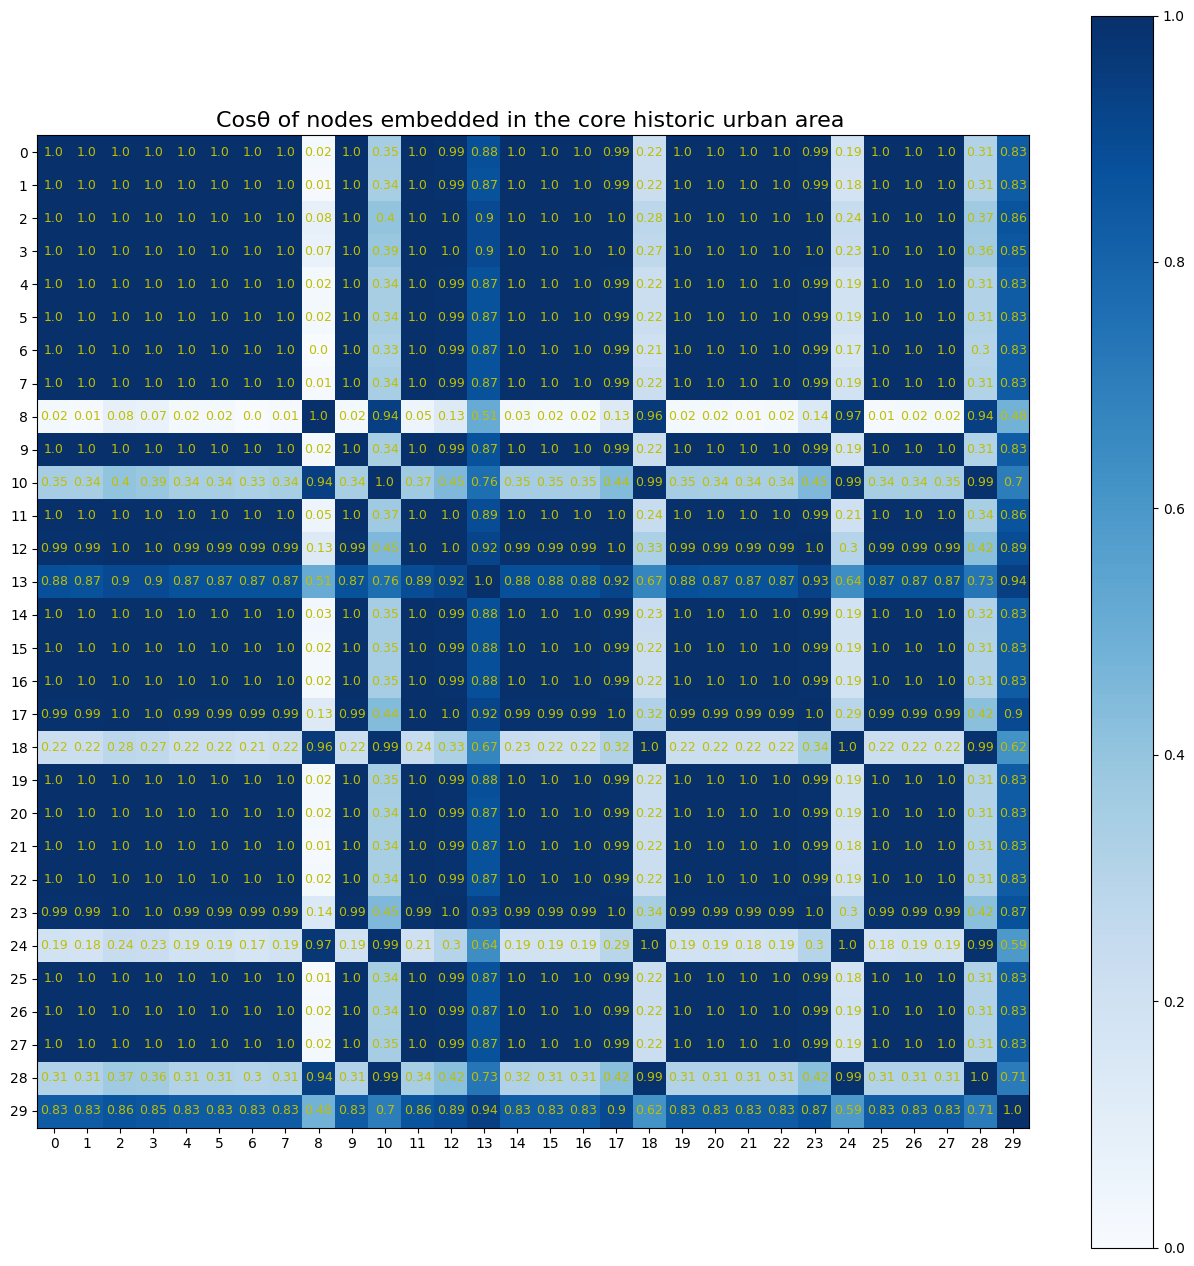

In [ ]:
# 输入的列表
AAAAAAAAAA = PPPP_MMMM

# 将列表转换为NumPy数组
data = np.array(AAAAAAAAAA)

# 归一化数据
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
normalized_data=np.round(normalized_data,2)#保留三位小数
#print(normalized_data)

# 创建一个4x4的图像
fig, ax = plt.subplots(figsize=(16, 16))

# 绘制热力图
im = ax.imshow(normalized_data, cmap='Blues')

# 添加颜色条
cbar = ax.figure.colorbar(im, ax=ax)

# 设置坐标轴标签
ax.set_xticks(np.arange(len(normalized_data[0])))
ax.set_yticks(np.arange(len(normalized_data)))

# 在每个单元格中添加数值
for i in range(len(normalized_data)):
    for j in range(len(normalized_data[0])):
       text = ax.text(j, i, str(normalized_data[i, j]), ha="center", va="center", color="y", fontsize=9)

# 添加标题
plt.title('Cosθ of nodes embedded in the core historic urban area ', fontsize=16)

# 显示图像
plt.show()

In [ ]:
for i in range(0,414):
  kkkkk=Calculate_1(141,i)
  b=str(i)
  print("开元寺西门与"+mapping_dict[b]+"的向量差的模长：",kkkkk)



开元寺西门与泉州外国语学校的向量差的模长： 0.02633444532456259
开元寺西门与泉州一中的向量差的模长： 0.003951960778520609
开元寺西门与学府街西段的向量差的模长： 0.17454214999484946
开元寺西门与北门街的向量差的模长： 3.0644269836361104
开元寺西门与华侨新村的向量差的模长： 3.0803035249644153
开元寺西门与医大二院鲤城院区的向量差的模长： 0.13991525809032643
开元寺西门与钟楼的向量差的模长： 0.011561228497570504
开元寺西门与泉州一院的向量差的模长： 0.005773848017457221
开元寺西门与东门的向量差的模长： 0.09565387159080659
开元寺西门与东湖公园的向量差的模长： 0.04475088072671321
开元寺西门与九一街口的向量差的模长： 2.8483596163348626
开元寺西门与温陵路中段的向量差的模长： 3.371976840626386
开元寺西门与津坂路口的向量差的模长： 3.5416684019795075
开元寺西门与水务集团的向量差的模长： 4.16876447637924
开元寺西门与刺桐公园南门的向量差的模长： 4.000076293217731
开元寺西门与东美街口的向量差的模长： 4.000045299273526
开元寺西门与泉秀街口的向量差的模长： 3.998514734128227
开元寺西门与客运中心站南门的向量差的模长： 4.000007152550978
开元寺西门与金帝花园的向量差的模长： 3.996041365622253
开元寺西门与现代广场的向量差的模长： 3.0155911616665296
开元寺西门与东海街道办事处的向量差的模长： 2.594302566682444
开元寺西门与黎明大学的向量差的模长： 0.031983641244487826
开元寺西门与宝珊花园的向量差的模长： 3.1232010813437605
开元寺西门与法坊路口的向量差的模长： 3.9649095351300434
开元寺西门与霞露口的向量差的模长： 3.999875305139529
开元寺西门与东海滨城的向量差的模长： 3.999900935853670

In [ ]:
P_1=0
for i in range(0,414):
  kkkkk=Calculate_2(141,i)
  if kkkkk>np.cos(np.pi/2):
    b=str(i)
    print("开元寺西门与"+mapping_dict[b]+"的cosθ：",kkkkk)
    P_1=P_1+1

print(P_1)


开元寺西门与泉州外国语学校的cosθ： tensor(1.0000, grad_fn=<DivBackward0>)
开元寺西门与泉州一中的cosθ： tensor(1.0000, grad_fn=<DivBackward0>)
开元寺西门与学府街西段的cosθ： tensor(0.9981, grad_fn=<DivBackward0>)
开元寺西门与北门街的cosθ： tensor(0.1219, grad_fn=<DivBackward0>)
开元寺西门与华侨新村的cosθ： tensor(0.1142, grad_fn=<DivBackward0>)
开元寺西门与医大二院鲤城院区的cosθ： tensor(0.9988, grad_fn=<DivBackward0>)
开元寺西门与钟楼的cosθ： tensor(1.0000, grad_fn=<DivBackward0>)
开元寺西门与泉州一院的cosθ： tensor(1.0000, grad_fn=<DivBackward0>)
开元寺西门与东门的cosθ： tensor(0.9995, grad_fn=<DivBackward0>)
开元寺西门与东湖公园的cosθ： tensor(0.9999, grad_fn=<DivBackward0>)
开元寺西门与九一街口的cosθ： tensor(0.1979, grad_fn=<DivBackward0>)
开元寺西门与温陵路中段的cosθ： tensor(0.0016, grad_fn=<DivBackward0>)
开元寺西门与现代广场的cosθ： tensor(0.0968, grad_fn=<DivBackward0>)
开元寺西门与东海街道办事处的cosθ： tensor(0.3914, grad_fn=<DivBackward0>)
开元寺西门与黎明大学的cosθ： tensor(0.9999, grad_fn=<DivBackward0>)
开元寺西门与宝珊花园的cosθ： tensor(0.0285, grad_fn=<DivBackward0>)
开元寺西门与孟衙巷口的cosθ： tensor(0.4650, grad_fn=<DivBackward0>)
开元寺西门与义全街西段的cosθ： tensor(0.1153, grad_fn=

In [ ]:
P_1=0
for i in range(0,414):
  kkkkk=Calculate_2(118,i)
  if kkkkk>np.cos(np.pi/3):
    b=str(i)
    print("关帝庙与"+mapping_dict[b]+"的cosθ：",kkkkk)
    P_1=P_1+1

print(P_1)

关帝庙与泉州外国语学校的cosθ： tensor(0.9929, grad_fn=<DivBackward0>)
关帝庙与泉州一中的cosθ： tensor(0.9923, grad_fn=<DivBackward0>)
关帝庙与学府街西段的cosθ： tensor(0.9973, grad_fn=<DivBackward0>)
关帝庙与医大二院鲤城院区的cosθ： tensor(0.9965, grad_fn=<DivBackward0>)
关帝庙与钟楼的cosθ： tensor(0.9926, grad_fn=<DivBackward0>)
关帝庙与泉州一院的cosθ： tensor(0.9925, grad_fn=<DivBackward0>)
关帝庙与东门的cosθ： tensor(0.9923, grad_fn=<DivBackward0>)
关帝庙与东湖公园的cosθ： tensor(0.9924, grad_fn=<DivBackward0>)
关帝庙与黎明大学的cosθ： tensor(0.9923, grad_fn=<DivBackward0>)
关帝庙与孟衙巷口的cosθ： tensor(0.5437, grad_fn=<DivBackward0>)
关帝庙与鲤城公安分局的cosθ： tensor(0.9975, grad_fn=<DivBackward0>)
关帝庙与幸福街口的cosθ： tensor(0.9987, grad_fn=<DivBackward0>)
关帝庙与泉秀街西段的cosθ： tensor(0.6784, grad_fn=<DivBackward0>)
关帝庙与蔬菜公司的cosθ： tensor(0.9332, grad_fn=<DivBackward0>)
关帝庙与甲第巷口的cosθ： tensor(0.9933, grad_fn=<DivBackward0>)
关帝庙与新门菜市的cosθ： tensor(0.9931, grad_fn=<DivBackward0>)
关帝庙与府文庙的cosθ： tensor(0.9928, grad_fn=<DivBackward0>)
关帝庙与关帝庙的cosθ： tensor(1., grad_fn=<DivBackward0>)
关帝庙与培元中学的cosθ： tensor(0.992

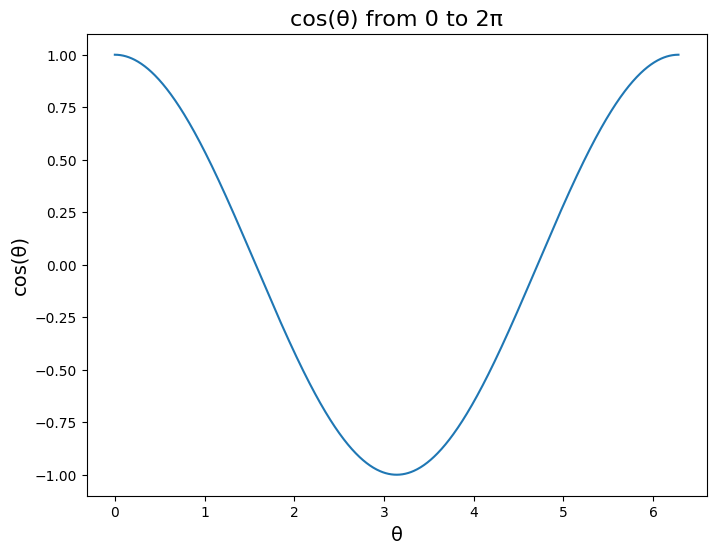

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建x数据(0到2pi之间等间隔的数据)
x = np.linspace(0, 2*np.pi, 1000)
# 计算cos(x)
y = np.cos(x)
# 创建图形
fig, ax = plt.subplots(figsize=(8, 6))
# 绘制cos曲线
ax.plot(x, y)
# 设置x轴标签
ax.set_xlabel('θ', fontsize=14)
# 设置y轴标签
ax.set_ylabel('cos(θ)', fontsize=14)
# 设置标题
ax.set_title('cos(θ) from 0 to 2π', fontsize=16)
# 显示图形
plt.show()

In [ ]:
for i in H:
  kkkkk=Calculate_1(58,i)
  b=str(i)
  print("鲤城公安分局与"+mapping_dict[b]+"的向量差的模长：",kkkkk)



鲤城公安分局与泉州外国语学校的向量差的模长： 0.21968097637740866
鲤城公安分局与泉州一中的向量差的模长： 0.22210522279135533
鲤城公安分局与学府街西段的向量差的模长： 0.14399291639819797
鲤城公安分局与医大二院鲤城院区的向量差的模长： 0.15387756375618158
鲤城公安分局与钟楼的向量差的模长： 0.22063245739098974
鲤城公安分局与泉州一院的向量差的模长： 0.22128585247462315
鲤城公安分局与东门的向量差的模长： 0.17936554343852787
鲤城公安分局与东湖公园的向量差的模长： 0.20891522662863868
鲤城公安分局与九一街口的向量差的模长： 2.7124806170496174
鲤城公安分局与黎明大学的向量差的模长： 0.21938609554346997
鲤城公安分局与孟衙巷口的向量差的模长： 2.2848597146675
鲤城公安分局与鲤城公安分局的向量差的模长： 0.0
鲤城公安分局与幸福街口的向量差的模长： 0.19958914189523716
鲤城公安分局与蔬菜公司的向量差的模长： 0.9750909628373331
鲤城公安分局与甲第巷口的向量差的模长： 0.21265442019872882
鲤城公安分局与新门菜市的向量差的模长： 0.22028200939565468
鲤城公安分局与府文庙的向量差的模长： 0.21994709392023068
鲤城公安分局与关帝庙的向量差的模长： 0.1969887612926316
鲤城公安分局与海关大楼的向量差的模长： 2.597753537299441
鲤城公安分局与培元中学的向量差的模长： 0.21871764079942396
鲤城公安分局与开元寺西门的向量差的模长： 0.22191471295159862
鲤城公安分局与省五建的向量差的模长： 0.22255738054240276
鲤城公安分局与新门街头的向量差的模长： 0.221241555834048
鲤城公安分局与温陵路南段的向量差的模长： 0.24949967715475643
鲤城公安分局与宝洲街西段的向量差的模长： 2.6739237108553806
鲤城公安分局与文化宫的向量差的模长： 0.2

In [ ]:
for i in range(0,414):
  kkkkk=Calculate_2(58,i)
  if kkkkk>np.cos(np.pi/2):
    b=str(i)
    print("鲤城公安分局与"+mapping_dict[b]+"的cosθ：",kkkkk)

鲤城公安分局与泉州外国语学校的cosθ： tensor(0.9974, grad_fn=<DivBackward0>)
鲤城公安分局与泉州一中的cosθ： tensor(0.9970, grad_fn=<DivBackward0>)
鲤城公安分局与学府街西段的cosθ： tensor(0.9982, grad_fn=<DivBackward0>)
鲤城公安分局与北门街的cosθ： tensor(0.1904, grad_fn=<DivBackward0>)
鲤城公安分局与华侨新村的cosθ： tensor(0.1825, grad_fn=<DivBackward0>)
鲤城公安分局与医大二院鲤城院区的cosθ： tensor(0.9981, grad_fn=<DivBackward0>)
鲤城公安分局与钟楼的cosθ： tensor(0.9972, grad_fn=<DivBackward0>)
鲤城公安分局与泉州一院的cosθ： tensor(0.9972, grad_fn=<DivBackward0>)
鲤城公安分局与东门的cosθ： tensor(0.9975, grad_fn=<DivBackward0>)
鲤城公安分局与东湖公园的cosθ： tensor(0.9969, grad_fn=<DivBackward0>)
鲤城公安分局与九一街口的cosθ： tensor(0.2247, grad_fn=<DivBackward0>)
鲤城公安分局与温陵路中段的cosθ： tensor(0.0673, grad_fn=<DivBackward0>)
鲤城公安分局与现代广场的cosθ： tensor(0.0588, grad_fn=<DivBackward0>)
鲤城公安分局与东海街道办事处的cosθ： tensor(0.3522, grad_fn=<DivBackward0>)
鲤城公安分局与黎明大学的cosθ： tensor(0.9970, grad_fn=<DivBackward0>)
鲤城公安分局与孟衙巷口的cosθ： tensor(0.4848, grad_fn=<DivBackward0>)
鲤城公安分局与龙头山的cosθ： tensor(0.0640, grad_fn=<DivBackward0>)
鲤城公安分局与临漳水闸的cosθ： tensor(

# 获取计算机认为的历史街区节点（文字）

In [98]:
#节点和数字间的映射关系

print(mapping_dict)

{'0': '泉州外国语学校', '1': '泉州一中', '2': '学府街西段', '3': '北门街', '4': '华侨新村', '5': '医大二院鲤城院区', '6': '钟楼', '7': '泉州一院', '8': '东门', '9': '东湖公园', '10': '九一街口', '11': '温陵路中段', '12': '津坂路口', '13': '水务集团', '14': '刺桐公园南门', '15': '东美街口', '16': '泉秀街口', '17': '客运中心站南门', '18': '金帝花园', '19': '现代广场', '20': '东海街道办事处', '21': '黎明大学', '22': '宝珊花园', '23': '法坊路口', '24': '霞露口', '25': '东海滨城', '26': '格联通街', '27': '东滨路口', '28': '格联通街口', '29': '公交东海站', '30': '霞塘', '31': '东梅', '32': '泉州师院', '33': '东海大街口', '34': '府西路', '35': '泉州行政中心', '36': '晋光小学东海校区', '37': '海星小区', '38': '福厦铁路泉州站', '39': '泉州软件园', '40': '霞美', '41': '曾坑', '42': '黄龙大桥头', '43': '招贤社区', '44': '丰泽实小潘山校区', '45': '北清西路', '46': '溪墘村口', '47': '送客亭', '48': '段湖村', '49': '西郊', '50': '孟衙巷口', '51': '龙头山', '52': '临漳水闸', '53': '金洲寺', '54': '金洲旱闸', '55': '新华旱闸', '56': '金山水闸', '57': '义全街西段', '58': '鲤城公安分局', '59': '幸福街口', '60': '泉秀街西段', '61': '浦西路口', '62': '刺桐路口', '63': '泉州电信公司', '64': '正骨医院', '65': '行政执法局', '66': '宝洲街口', '67': '坪山路南段', '68': '客运中心站东门', '69': '院前公交站', '70

In [99]:
mapping_dict["58"]

'鲤城公安分局'

In [100]:
new_list = []
for key in H:
  new_list.append(mapping_dict[str(key)])

In [101]:
new_list

['泉州外国语学校',
 '泉州一中',
 '学府街西段',
 '北门街',
 '华侨新村',
 '医大二院鲤城院区',
 '钟楼',
 '泉州一院',
 '东门',
 '东湖公园',
 '九一街口',
 '温陵路中段',
 '津坂路口',
 '东海街道办事处',
 '黎明大学',
 '孟衙巷口',
 '龙头山',
 '临漳水闸',
 '义全街西段',
 '鲤城公安分局',
 '幸福街口',
 '普明村',
 '三千坛',
 '蔬菜公司',
 '甲第巷口',
 '新门菜市',
 '府文庙',
 '关帝庙',
 '棋盘园',
 '海关大楼',
 '九日山',
 '九日山(307省道)',
 '丰州',
 '新华小区',
 '西湖小区',
 '培元中学',
 '开元寺西门',
 '省五建',
 '新门街头',
 '温陵路南段',
 '宝洲街西段',
 '东南医院',
 '浦西村口',
 '文化宫',
 '百源路',
 '天后路北段',
 '承天寺',
 '市消防支队古城中队',
 '泉秀街道办事处',
 '红梅新村',
 '泉州电大',
 '学府街东段',
 '城北路西段',
 '朝天门',
 '云鹿路口',
 '市中医院',
 '笋江路中段',
 '笋江路东段',
 '浮桥站',
 '上埕路口',
 '水门巷口',
 '指挥巷口',
 '义全街口',
 '樟崎村口',
 '万祥汽车站',
 '池峰路中段',
 '大希夷',
 '刺桐新村路口',
 '大隘门',
 '土地后',
 '温陵路公交首末站',
 '九一路口',
 '鲤城区政府',
 '九一街',
 '仁风社区',
 '打锡街',
 '城西路北段',
 '泉州体校',
 '蟳埔菜市',
 '泉州大桥东(宝海庵)',
 '顺济新桥东(金山公园)',
 '金山桥',
 '鲤城交警三中队人行桥',
 '五堡公园(笋浯溪)',
 '五宝街人行桥（泉郡溪灵宫）',
 '泉州老干部活动中心(笋浯溪)',
 '泉郡日月太保宫(笋浯溪)',
 '新华桥(笋浯溪)',
 '芳草园(笋浯溪)',
 '康惠楼(笋浯溪)',
 '升平社区人行桥',
 '江滨北路(笋浯溪)',
 '六角亭冬泳人行桥',
 '小岞海产品干货(桥)',
 '鸿记茶庄(桥)',
 '跃进社区居委会办公楼(桥)',
 '福建省泉州市第七中学(桥)',
 '幸福

In [102]:
len(new_list)

100

# 现在我们开始寻找计算机认为的历史街区节点之间的连接关系

In [103]:
new_list

['泉州外国语学校',
 '泉州一中',
 '学府街西段',
 '北门街',
 '华侨新村',
 '医大二院鲤城院区',
 '钟楼',
 '泉州一院',
 '东门',
 '东湖公园',
 '九一街口',
 '温陵路中段',
 '津坂路口',
 '东海街道办事处',
 '黎明大学',
 '孟衙巷口',
 '龙头山',
 '临漳水闸',
 '义全街西段',
 '鲤城公安分局',
 '幸福街口',
 '普明村',
 '三千坛',
 '蔬菜公司',
 '甲第巷口',
 '新门菜市',
 '府文庙',
 '关帝庙',
 '棋盘园',
 '海关大楼',
 '九日山',
 '九日山(307省道)',
 '丰州',
 '新华小区',
 '西湖小区',
 '培元中学',
 '开元寺西门',
 '省五建',
 '新门街头',
 '温陵路南段',
 '宝洲街西段',
 '东南医院',
 '浦西村口',
 '文化宫',
 '百源路',
 '天后路北段',
 '承天寺',
 '市消防支队古城中队',
 '泉秀街道办事处',
 '红梅新村',
 '泉州电大',
 '学府街东段',
 '城北路西段',
 '朝天门',
 '云鹿路口',
 '市中医院',
 '笋江路中段',
 '笋江路东段',
 '浮桥站',
 '上埕路口',
 '水门巷口',
 '指挥巷口',
 '义全街口',
 '樟崎村口',
 '万祥汽车站',
 '池峰路中段',
 '大希夷',
 '刺桐新村路口',
 '大隘门',
 '土地后',
 '温陵路公交首末站',
 '九一路口',
 '鲤城区政府',
 '九一街',
 '仁风社区',
 '打锡街',
 '城西路北段',
 '泉州体校',
 '蟳埔菜市',
 '泉州大桥东(宝海庵)',
 '顺济新桥东(金山公园)',
 '金山桥',
 '鲤城交警三中队人行桥',
 '五堡公园(笋浯溪)',
 '五宝街人行桥（泉郡溪灵宫）',
 '泉州老干部活动中心(笋浯溪)',
 '泉郡日月太保宫(笋浯溪)',
 '新华桥(笋浯溪)',
 '芳草园(笋浯溪)',
 '康惠楼(笋浯溪)',
 '升平社区人行桥',
 '江滨北路(笋浯溪)',
 '六角亭冬泳人行桥',
 '小岞海产品干货(桥)',
 '鸿记茶庄(桥)',
 '跃进社区居委会办公楼(桥)',
 '福建省泉州市第七中学(桥)',
 '幸福

In [ ]:
#G.nodes  查看点属性

In [ ]:
#G.edges  查看边属性

**获取节点的邻居**

In [104]:
# 过滤空节点
df = df.dropna(subset=["前一节点", "后一节点"])
G_1 = nx.from_pandas_edgelist(df,"前一节点","后一节点", edge_attr=True, create_using=nx.MultiGraph())  #edge_attr=True,边的属性信息也要导入

In [105]:
connected_nodes = G_1.neighbors("泉州外国语学校")
connected_nodes=list(connected_nodes)
print(connected_nodes)

['泉州一中', '学府街东段', '南俊路北段']


In [106]:
connected_nodes[1]

'学府街东段'

In [107]:
new_list[1]

'泉州一中'

In [108]:
result = []
for m in new_list:
    neighbors = G_1.neighbors(m) # 获得节点m的所有邻居
    common_neighbors = [n for n in neighbors if n in new_list] # 保留那些在new_list中的邻居
    result.append([m + ":" + ", ".join(common_neighbors)])



In [109]:
result

[['泉州外国语学校:泉州一中, 学府街东段'],
 ['泉州一中:泉州外国语学校, 学府街西段'],
 ['学府街西段:泉州一中, 北门街, 普明村, 朝天门'],
 ['北门街:学府街西段, 华侨新村, 普明村, 朝天门'],
 ['华侨新村:北门街, 医大二院鲤城院区'],
 ['医大二院鲤城院区:华侨新村, 钟楼'],
 ['钟楼:医大二院鲤城院区, 泉州一院, 承天寺'],
 ['泉州一院:钟楼, 东门, 承天寺'],
 ['东门:泉州一院, 东湖公园, 红梅新村'],
 ['东湖公园:东门, 九一街口, 仁风社区'],
 ['九一街口:东湖公园, 温陵路中段'],
 ['温陵路中段:九一街口, 津坂路口, 海关大楼, 九一路口, 棋盘园'],
 ['津坂路口:温陵路中段, 棋盘园'],
 ['东海街道办事处:黎明大学'],
 ['黎明大学:东海街道办事处'],
 ['孟衙巷口:龙头山, 城西路北段'],
 ['龙头山:孟衙巷口, 临漳水闸, 三千坛'],
 ['临漳水闸:龙头山, 三千坛, 升平社区人行桥, 六角亭冬泳人行桥'],
 ['义全街西段:鲤城公安分局'],
 ['鲤城公安分局:义全街西段, 幸福街口, 义全街口, 大隘门'],
 ['幸福街口:鲤城公安分局, 天后路北段, 温陵路南段'],
 ['普明村:北门街, 学府街西段, 大希夷'],
 ['三千坛:蔬菜公司, 浮桥站, 笋江路东段, 临漳水闸, 龙头山'],
 ['蔬菜公司:三千坛, 甲第巷口, 市消防支队古城中队'],
 ['甲第巷口:蔬菜公司, 新门菜市'],
 ['新门菜市:甲第巷口, 府文庙, 省五建, 新门街头, 鲤城区政府'],
 ['府文庙:新门菜市, 关帝庙, 新门街头, 百源路, 水门巷口'],
 ['关帝庙:府文庙, 棋盘园, 百源路, 天后路北段'],
 ['棋盘园:关帝庙, 海关大楼, 津坂路口, 温陵路中段'],
 ['海关大楼:棋盘园, 温陵路南段, 温陵路中段, 温陵路公交首末站'],
 ['九日山:九日山(307省道)'],
 ['九日山(307省道):九日山'],
 ['丰州:'],
 ['新华小区:西湖小区'],
 ['西湖小区:新华小区, 培元中学, 城北路西段'],
 ['培元中学:西湖小区, 开元寺西门, 城西路北段'],
 ['开元寺西门:培

**查询方式**

In [110]:
target = "西湖街东段"

matching_sublists = [sublist for sublist in result if target in sublist[0]]

matching_sublists

[]

# 三维可视化（训练完成后优先运行）

In [111]:
h.shape

torch.Size([415, 6])

In [112]:
B=data.y
B.shape

torch.Size([415])

**转为普通列表**

In [113]:
# 将NumPy数组转换为Python列表
h_1= h.tolist()
B_1=B.tolist()

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

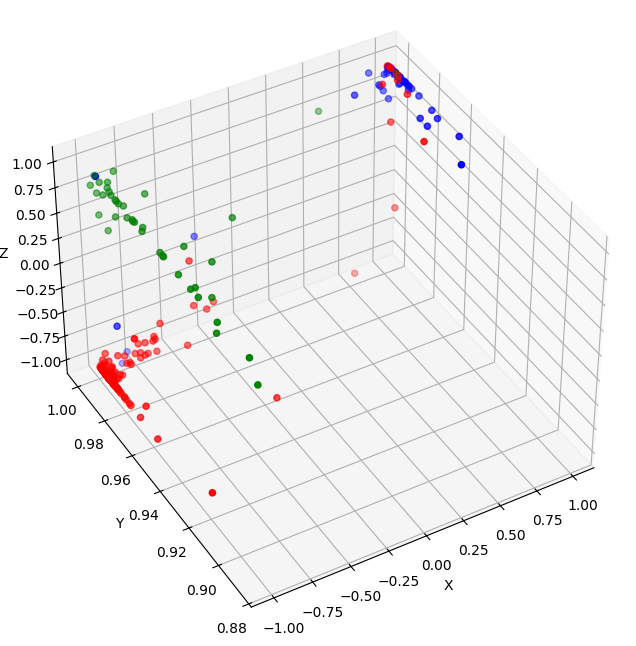

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 提取h的坐标数据
x = [row[0] for row in h_1]
y = [row[2] for row in h_1]
z = [row[1] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=40, azim=-120)

# 显示图形
plt.show()

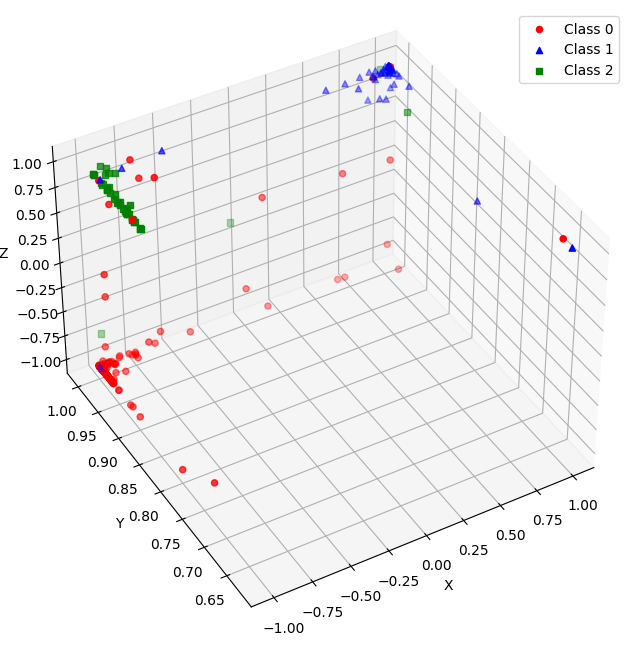

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch


# 提取h_1的坐标数据
x = [row[0] for row in h_1]
y = [row[2] for row in h_1]
z = [row[1] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 定义颜色和形状对应关系
colors_shapes = {
    0: ('red', 'o'),  # 红色圆点
    1: ('blue', '^'),  # 蓝色三角形
    2: ('green', 's')  # 绿色正方形
}

# 绘制散点图，并根据列表B_1的值设置不同的颜色和形状
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    color, marker = colors_shapes[label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=color, marker=marker, label=f'Class {label}')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=40, azim=-120)

# 添加图例
plt.legend()

# 显示图形
plt.show()
